## Importing the relevant libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from sklearn import pipeline
from sklearn import compose
import itertools

## Loading raw data

In [5]:
raw_data = pd.read_csv("loan_approval_dataset.csv")
raw_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Checking for missing values

In [8]:
raw_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Handling the object columns

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
data = raw_data.drop(["loan_id"] , axis = 1)
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## Declare inputs and target

In [16]:
# Drop the 'loan_id' column as it's not needed for analysis
inputs = data.drop(' loan_status', axis=1)
target = data[' loan_status']

### Declaring the numeric and string features for making Pipeline

In [19]:
# all numerical features index
numeric_features = inputs.select_dtypes(exclude = ["object"]).columns
numeric_features

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [21]:
# all numerical features index
string_features = inputs.select_dtypes(include = ["object"]).columns
string_features

Index([' education', ' self_employed'], dtype='object')

In [23]:
continious_numeric_features = [col for col in numeric_features if data[col].nunique() >= 10]

# Select discrete numeric features (those with fewer than 10 unique values)
discrete_numeric_features = [col for col in numeric_features if col not in continious_numeric_features]

## Train test split
80-20 split

In [25]:
x_train , x_test , y_train , y_test = model_selection.train_test_split(inputs , target , test_size = 0.2 , random_state = 42 )

## Making Pipeline

In [28]:
# Create a pipeline for transforming string features using OneHotEncoder
string_transformer= pipeline.Pipeline([
    ('One_Hot_Encoder', preprocessing.OneHotEncoder(drop='first', sparse_output=False))
])
# Create a pipeline for transforming numeric features using PowerTransformer
numeric_transformer= pipeline.Pipeline([
     ('scaler', preprocessing.StandardScaler())
])

In [30]:
preprocessor= compose.ColumnTransformer([
    ('numeric_transformer', numeric_transformer, continious_numeric_features),
    ('string_transformer', string_transformer, string_features)
], remainder='passthrough')

## RandomForest Model with pipeline

In [33]:
# Initialize the RandomForestClassifier model
model= ensemble.RandomForestClassifier(random_state=42)

# Create a pipeline with preprocessing, and the model
pipe= pipeline.Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

pipe.fit(x_train, y_train)

C:\Users\rasol\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [' income_annum',
                                                   ' loan_amount', ' loan_term',
                                                   ' cibil_score',
                                                   ' residential_assets_value',
                                                   ' commercial_assets_value',
                                                   ' luxury_assets_value',
                                                   ' bank_asset_value']),
                                                 ('string_transformer',
                                                  Pipeline(steps=[('One_Hot_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index([' education', ' self_employed'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

## Test and evaluate the model

In [36]:
y_test_hat = pipe.predict(x_test)

### Confusion matrix

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Handling a problem
y_test and y_test_hat are strings and we need to encode these two

In [42]:
le = preprocessing.LabelEncoder()

# convert string to numerical
y_test_encoded = le.fit_transform(y_test)
y_test_hat_encoded = le.transform(y_test_hat)
print("Classes in y_test:", le.classes_)

Classes in y_test: [' Approved' ' Rejected']


### Plot confusion matrix and acuuracy

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Confusion matrix, without normalization
[[528   8]
 [ 12 306]]


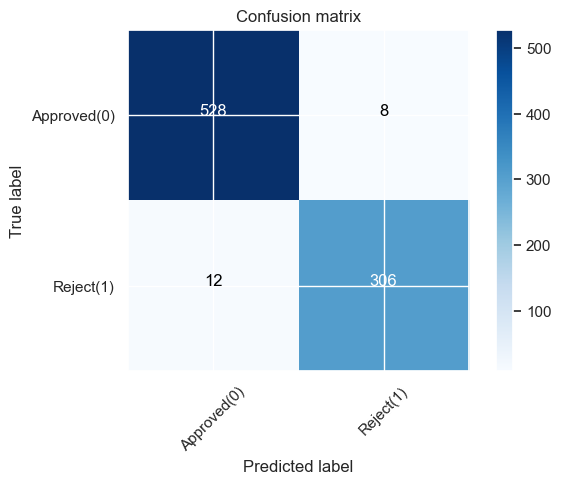

In [49]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_encoded, y_test_hat_encoded, labels=[0,1])
np.set_printoptions(precision=2)

print (metrics.classification_report(y_test_encoded, y_test_hat_encoded))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Approved(0)','Reject(1)'],normalize= False,  title='Confusion matrix')